In [1]:
import random
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

In [2]:
# 读取示例图片
img1_path = './cat.jpg'
img2_path = './dog.jpg'
img1 = plt.imread(img1_path)
img2 = plt.imread(img2_path)

Text(0.5, 1.0, 'dog')

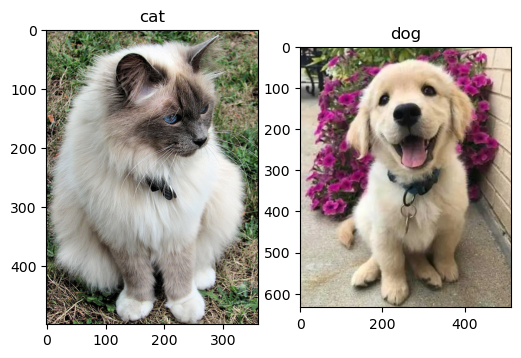

In [3]:
# 示例图片展示
fig = plt.figure(num=1, figsize=(6, 4), dpi=100)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(img1)
ax1.set_title('cat')
ax2.imshow(img2)
ax2.set_title('dog')

### 1、HSV变换

Text(0.5, 1.0, 'hsv_image')

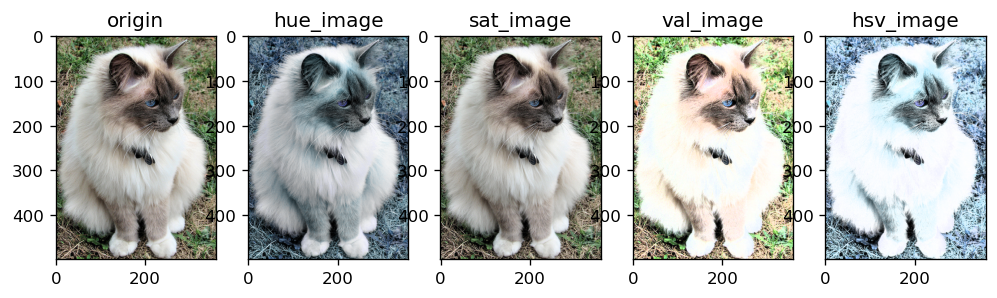

In [4]:
hgain = 0.5
sgain = 0.5
vgain = 0.5
# 展现原图
fig = plt.figure(num='hsv_test', figsize=(10, 50), dpi=120)
ax1 = fig.add_subplot(1, 5, 1)
dtype = img1.dtype
ax1.imshow(img1)
ax1.set_title('origin')
# 进行Hue调整
r = np.random.uniform(-2, 2, 3)*[hgain, sgain, vgain]+1
# r = np.random.uniform(0, 2, 3)
hue, sat, val = cv2.split(cv2.cvtColor(img1, cv2.COLOR_BGR2HSV))
x = np.arange(0, 256, dtype=r.dtype)
lut_hue = ((x*r[0])%180).astype(dtype)
hue_image = cv2.merge((cv2.LUT(hue, lut_hue), cv2.LUT(sat, np.clip(x, 0, 255).astype(dtype)),cv2.LUT(val, np.clip(x, 0, 255).astype(dtype))))
hue_image = cv2.cvtColor(hue_image, cv2.COLOR_HSV2BGR)
ax2 = fig.add_subplot(1, 5, 2)
ax2.imshow(hue_image)
ax2.set_title('hue_image')
# 单独对Sat进行调整
lut_sat = np.clip(x*r[1], 0, 255).astype(dtype)
sat_image = cv2.merge((cv2.LUT(hue, np.clip(x, 0, 255).astype(dtype)),
                      cv2.LUT(sat, lut_sat),
                      cv2.LUT(val, np.clip(x, 0, 255).astype(dtype))))
sat_image = cv2.cvtColor(sat_image, cv2.COLOR_HSV2BGR)
ax3 = fig.add_subplot(1, 5, 3)
ax3.imshow(sat_image)
ax3.set_title('sat_image')
# 单独进行明亮度调整
lut_val = np.clip(x*r[2], 0, 255).astype(dtype)
val_image = cv2.merge((cv2.LUT(hue, np.clip(x, 0, 255).astype(dtype)),
                      cv2.LUT(sat, np.clip(x, 0, 255).astype(dtype)),
                      cv2.LUT(val, lut_val)))
val_image = cv2.cvtColor(val_image, cv2.COLOR_HSV2BGR)
ax4 = fig.add_subplot(1, 5, 4)
ax4.imshow(val_image)
ax4.set_title('val_image')
# 综合调整
hsv_image = cv2.merge((cv2.LUT(hue, lut_hue), cv2.LUT(sat, lut_sat), cv2.LUT(val, lut_val)))
hsv_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
hsv_image = np.array(hsv_image, dtype=np.uint8)
ax5 = fig.add_subplot(1, 5, 5)
ax5.imshow(hsv_image)
ax5.set_title('hsv_image')

### 2、旋转缩放

Text(0.5, 1.0, 'scale_rotation_image')

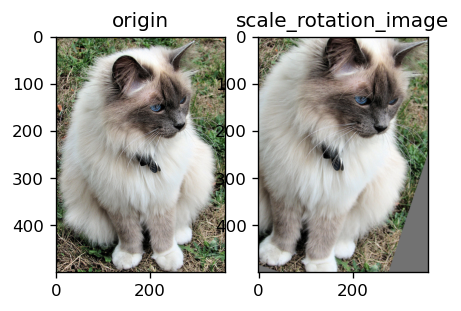

In [5]:
degrees = 45
scale = 0.5
h, w, _ = img1.shape
# rotation and scale matrix
angle = random.uniform(-degrees, degrees)
random_scale = random.uniform(1-scale, 1+scale)
# 获得变换矩阵【2x3】,对比getPerspectivetransform【3x3】与getAffinetransform【2x3】方法获得的矩阵
rs_matrix = cv2.getRotationMatrix2D(angle=angle, center=(h/2, w/2), scale=random_scale)
# 进行变换，对比warpAffine与warpPerspective方法
img_rotation = cv2.warpAffine(img1, rs_matrix, dsize=(w, h), borderValue=(114,114,114))
# 原始图与变换图想对比
fig = plt.figure(num=2, figsize=(4, 8), dpi=120)
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1)
ax1.set_title('origin')
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img_rotation)
ax2.set_title('scale_rotation_image')

## 3、平移

Text(0.5, 1.0, 't_image')

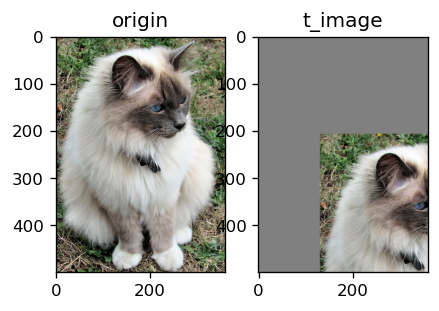

In [6]:
h, w, _ = img1.shape
# 图像平移
dx = random.uniform(0.2, 0.5)*w
dy = random.uniform(0.2, 0.5)*h
# 构造平移矩阵
t_matrix = np.float32([[1, 0, dx], [0, 1, dy]])
t_image = cv2.warpAffine(img1, t_matrix, dsize=(w, h), borderValue=(128, 128, 128))
# 图像对比展示
fig = plt.figure(num='t_image', figsize=(4, 8), dpi=120)
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img1)
ax1.set_title('origin')
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(t_image)
ax2.set_title('t_image')

## 4、错切与非垂直投影

Text(0.5, 1.0, 'test')

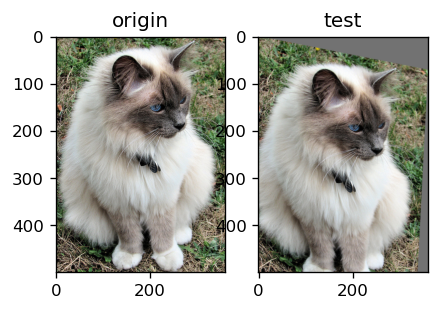

In [10]:
# 图像信息
h, w, _ = img1.shape
degree = 30
x01 = math.tan(np.random.uniform(-degree, degree)*math.pi/180)
x10 = math.tan(np.random.uniform(-degree, degree)*math.pi/180)
# 构造变换矩阵
matrix = np.float32([[1, x01, 0], [x10, 1, 0]])
# 变化
img_out = cv2.warpAffine(img1, matrix, dsize=(w, h), borderValue=(114, 114, 114))
# 图片展现
fig = plt.figure(num='test', figsize=(4, 8), dpi=120)
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img1)
ax1.set_title('origin')
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img_out)
ax2.set_title('test')

## 5、透视变换

Text(0.5, 1.0, 'perspective')

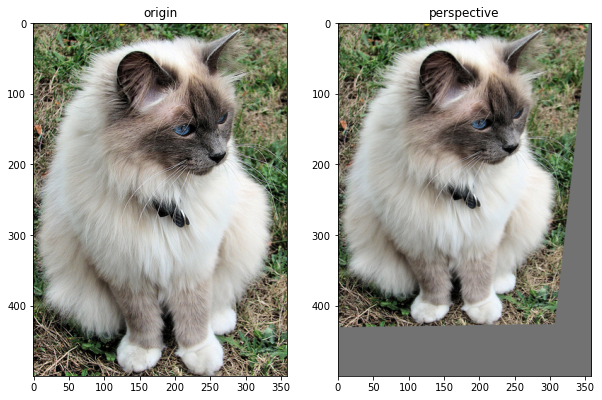

In [12]:
p = 0.001
h, w, c = img1.shape
im_copy = img1.copy()
P = np.eye(3)
P[2, 0] = random.uniform(-p, p)
P[2, 1] = random.uniform(-p, p)
perspective = cv2.warpPerspective(im_copy, P, dsize=(w, h), borderValue=(114, 114, 114))

plt.figure(figsize=(10, 20)) 
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("origin")

plt.subplot(1,2,2)
plt.imshow(perspective)
plt.title("perspective")

## 6、翻转

Text(0.5, 1.0, 'left_right')

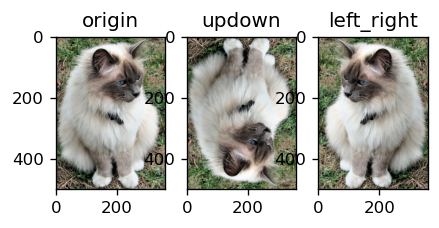

In [15]:
# 图像左右、上下翻转
img_ud = np.flipud(img1)
img_lr = np.fliplr(img1)
# 显示图片
fig = plt.figure(num='test_flip', figsize=(4, 12), dpi=120)
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(img1)
ax1.set_title('origin')
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(img_ud)
ax2.set_title('updown')
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(img_lr)
ax3.set_title('left_right')

## 7、mosaic